In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_excel("studentstudy.xlsx")

In [6]:
df.head()

,Student,Study hours,Exam scores
0,1,1.0,45
1,2,1.5,50
2,3,2.0,52
3,4,2.2,53
4,5,2.8,58


In [7]:
df.drop

<bound method DataFrame.drop of     Student  Study hours  Exam scores
0         1          1.0           45
1         2          1.5           50
2         3          2.0           52
3         4          2.2           53
4         5          2.8           58
5         6          3.0           60
6         7          3.2           62
7         8          3.5           63
8         9          4.0           67
9        10          4.1           68
10       11          4.5           69
11       12          5.0           72
12       13          5.3           74
13       14          5.7           76
14       15          6.0           78
15       16          6.5           82
16       17          7.0           85
17       18          7.2           87
18       19          7.5           89
19       20          8.0           91
20       21          8.5           94
21       22          9.0           96
22       23          9.5           98
23       24         10.0          100
24       25       

In [8]:
df

,Student,Study hours,Exam scores
0,1,1.0,45
1,2,1.5,50
2,3,2.0,52
3,4,2.2,53
4,5,2.8,58
5,6,3.0,60
6,7,3.2,62
7,8,3.5,63
8,9,4.0,67
9,10,4.1,68


In [9]:
df['Student'].index

RangeIndex(start=0, stop=25, step=1)

In [10]:
df

,Student,Study hours,Exam scores
0,1,1.0,45
1,2,1.5,50
2,3,2.0,52
3,4,2.2,53
4,5,2.8,58
5,6,3.0,60
6,7,3.2,62
7,8,3.5,63
8,9,4.0,67
9,10,4.1,68


In [11]:
df=pd.read_excel("studentstudy.xlsx",index_col="Student")

In [12]:
df

,Study hours,Exam scores
Student,,
1,1.0,45
2,1.5,50
3,2.0,52
4,2.2,53
5,2.8,58
6,3.0,60
7,3.2,62
8,3.5,63
9,4.0,67


Text(0, 0.5, 'Exam scores')

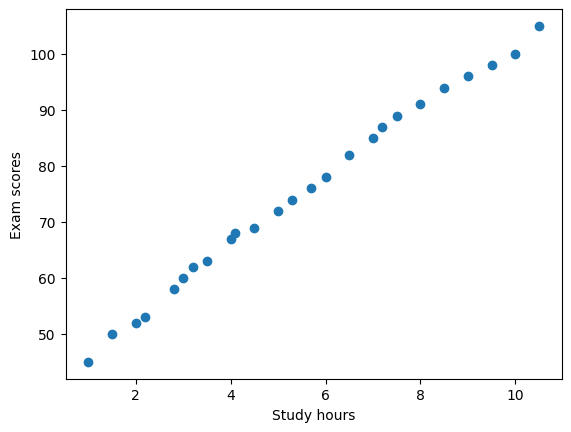

In [13]:
plt.scatter(df['Study hours'],df['Exam scores'])
plt.xlabel("Study hours")
plt.ylabel("Exam scores")

In [14]:
df.corr()

,Study hours,Exam scores
Study hours,1.00000,0.99759
Exam scores,0.99759,1.00000


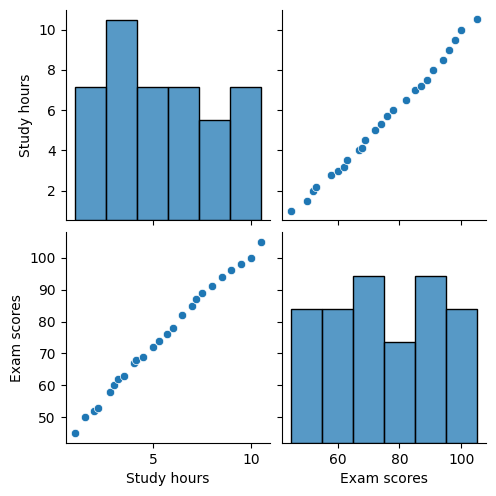

In [15]:
import seaborn as sns
sns.pairplot(df)

In [16]:
X=df[['Study hours']]
Y=df['Exam scores']

In [17]:
X

,Study hours
Student,
1,1.0
2,1.5
3,2.0
4,2.2
5,2.8
6,3.0
7,3.2
8,3.5
9,4.0


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [19]:
X_train.shape

(18, 1)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [22]:
X_test=scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regression=LinearRegression(n_jobs=-1)

In [25]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [26]:
print("slope=",regression.coef_)
print("intercept=",regression.intercept_)

slope= [17.26194216]
intercept= 75.61111111111111


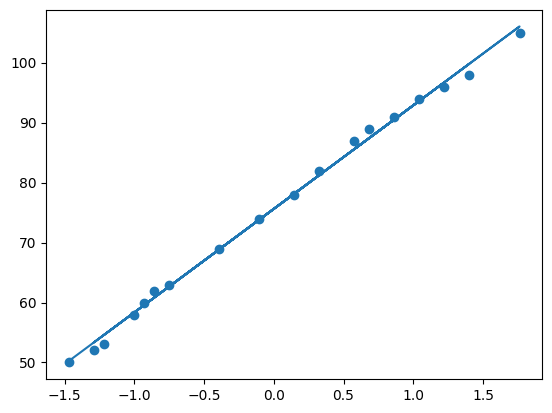

In [27]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [28]:
y_pred=regression.predict(X_test)
print(y_pred)

[ 65.72410895  84.32683078  47.12138712 102.92955261  71.92501623
  66.34419968  76.26565132]


In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.5687834985819755
1.2852050590389987
1.6027424929108156


In [31]:
from sklearn.metrics import r2_score

In [32]:
score=r2_score(Y_test,y_pred)
print(score)

0.9895906060676053


In [33]:
import statsmodels.api as sm

In [34]:
model=sm.OLS(Y_train,X_train).fit()

In [35]:
prediction=model.predict(X_test)
print(prediction)

[ -9.88700216   8.71571967 -28.48972399  27.3184415   -3.68609488
  -9.26691143   0.65454021]


In [36]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Exam scores   R-squared (uncentered):                   0.050
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.8859
Date:                Wed, 12 Mar 2025   Prob (F-statistic):                       0.360
Time:                        18:59:08   Log-Likelihood:                         -103.40
No. Observations:                  18   AIC:                                      208.8
Df Residuals:                      17   BIC:                                      209.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\python\code\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [39]:
print(regression.predict(scaler.transform([[input("Enter Study hour")]])))

[56.54676618]


d:\python\code\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
